## Isolation Forest for Anomaly Detection
**Objective**: Understand and apply the Isolation Forest algorithm to identify anomalies in datasets.

### Task: Anomaly Detection in Sensor Data
**Steps**:
1. Load Dataset
2. Feature Selection
3. Isolation Forest Implementation
4. Plot Results

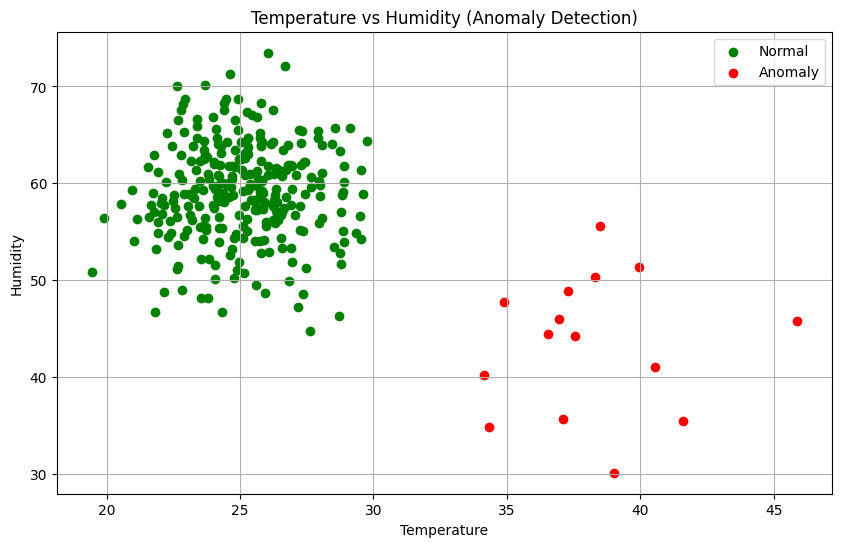

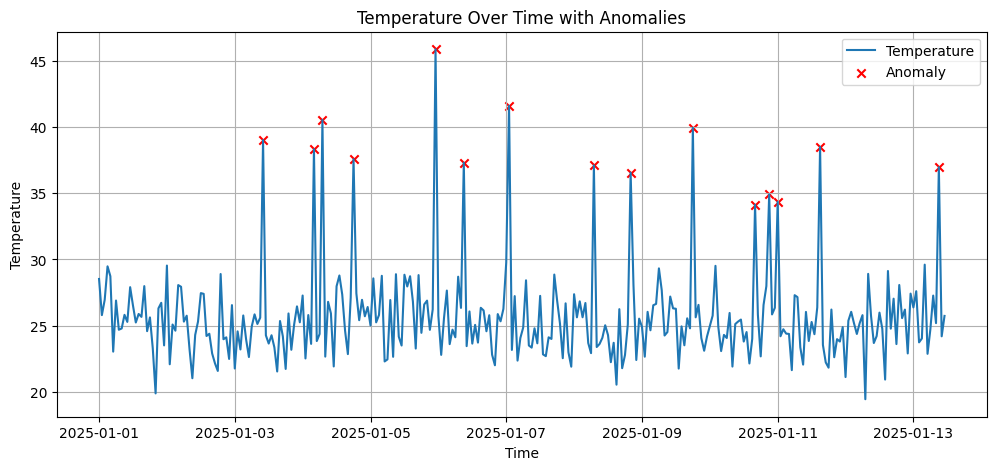

✅ Anomaly detection complete.
Number of anomalies found: 15


In [4]:
# Isolation Forest Anomaly Detection - Clean Version

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# ---------------------------
# 1. Generate synthetic sensor data
# ---------------------------
np.random.seed(0)
n = 300

timestamps = pd.date_range(start='2025-01-01', periods=n, freq='H')
temperature = np.random.normal(25, 2, n)
humidity = np.random.normal(60, 5, n)
vibration = np.random.normal(0.3, 0.05, n)

# Inject anomalies
for i in np.random.choice(n, 15, replace=False):
    temperature[i] += np.random.uniform(10, 20)
    humidity[i] -= np.random.uniform(10, 30)
    vibration[i] += np.random.uniform(0.4, 0.7)

# Create and save DataFrame
df = pd.DataFrame({
    'timestamp': timestamps,
    'temperature': temperature,
    'humidity': humidity,
    'vibration': vibration
})
df.to_csv("sensor_data.csv", index=False)

# ---------------------------
# 2. Load and select features
# ---------------------------
df = pd.read_csv("sensor_data.csv")
X = df[['temperature', 'humidity', 'vibration']]

# ---------------------------
# 3. Apply Isolation Forest
# ---------------------------
model = IsolationForest(n_estimators=100, contamination=0.05, random_state=0)
df['anomaly'] = model.fit_predict(X)

# ---------------------------
# 4. Plot results
# ---------------------------

# A. 2D Scatter Plot (Temperature vs Humidity)
plt.figure(figsize=(10, 6))
plt.scatter(df[df['anomaly'] == 1]['temperature'],
            df[df['anomaly'] == 1]['humidity'],
            color='green', label='Normal')
plt.scatter(df[df['anomaly'] == -1]['temperature'],
            df[df['anomaly'] == -1]['humidity'],
            color='red', label='Anomaly')
plt.title("Temperature vs Humidity (Anomaly Detection)")
plt.xlabel("Temperature")
plt.ylabel("Humidity")
plt.legend()
plt.grid(True)
plt.show()

# B. Time series plot (optional)
df['timestamp'] = pd.to_datetime(df['timestamp'])
plt.figure(figsize=(12, 5))
plt.plot(df['timestamp'], df['temperature'], label='Temperature')
plt.scatter(df[df['anomaly'] == -1]['timestamp'],
            df[df['anomaly'] == -1]['temperature'],
            color='red', marker='x', label='Anomaly')
plt.title("Temperature Over Time with Anomalies")
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.legend()
plt.grid(True)
plt.show()

# ---------------------------
# Final confirmation
# ---------------------------
print("✅ Anomaly detection complete.")
print("Number of anomalies found:", (df['anomaly'] == -1).sum())
